In [107]:
import numpy as np
import random
import time
from PIL import Image, ImageDraw

In [134]:
# returns all edges for a given index (int, int) given an existing shape
def find_edges(index, shape):
    
    top = (index[0], index[1]-1)
    bottom = (index[0], index[1]+1)
    left = (index[0]-1, index[1])
    right = (index[0]+1, index[1])
    
    e = [top, bottom, left, right]
    e_found = []
    # checks whether the edges fit in the nXn grid & whether the supposed edge is, in fact, filled in
    for edge in e:  
        valid = True
        for i in edge:
            if i < 0 or i > shape.shape[0]-1:
                #e.remove(edge)
                valid = False
                break
                
        if valid and shape[edge] > 0:
            #e.remove(edge)
            continue
            
        if valid:
            e_found.append(edge)
    
    return e_found


# returns an image that represents shape (2D np array)
# color is a list representing RGB
# res is an (int, int) tuple storing the x and y multipliers for the array size
def shape_as_image(shape, res = (64, 64), color = [200, 200, 200, 255], random_color = False):
    # generates a new shape based on res which adds an extra dimension for color
    new_shape = np.zeros((shape.shape[0]*res[1], shape.shape[1]*res[0], 4), dtype=np.uint8)
    
    # colors in each block of pixels that corresponds to a value greater than 0 in shape
    for r in range(len(shape)):
        for i in range(len(shape[r])):
            if shape[r][i] > 0:
                if random_color:
                    color = [random.randint(0,255), random.randint(0,255), random.randint(0,255), 255]
                for row in new_shape[r*res[1]:r*res[1]+res[1]]:
                    row[i*res[0]:i*res[0]+res[0]] = color
    
    return Image.fromarray(new_shape, 'RGBA')

In [135]:
# randomly generates a shape given a grid_size (int) and number of generations (int)
def organic_shape(grid_size = 8, generations = 5):
    # initializes matrix of zeros to store the shape
    shape = np.zeros((grid_size, grid_size))

    # stores edges for each generative pass
    edges = []

    # chooses a random starting point (int, int) for generation
    start_index = (random.randint(0,7), random.randint(0,7))
    shape[start_index] += 1

    # locates and adds starting edges to the edges list
    for e in find_edges(start_index, shape):
        edges.append(e)

    # generates shape body over a specified number of passes (generations (int))
    for z in range(generations): 
        if len(edges) < 1:
            break

        # used to store the new edges which will used to update edges at the end of each pass
        temp_edges = []

        # generates a random selection of edges which will become part of the body
        inds = [random.randint(0,len(edges)-1) for x in range(len(edges))]

        # adds body at all selected edges in inds
        for x in inds:
            # catches doubles created in inds
            if shape[edges[x]] < 1:
                shape[edges[x]] += 1
                # finds and adds new edges to temp_edges
                for e in find_edges(edges[x], shape):
                    temp_edges.append(e)

        edges = temp_edges[:]
        
    return shape

In [145]:
frames = []
for x in range(100):
    f = shape_as_image(organic_shape(), random_color = True)
    frames.append(f)
frames[0].save('./organic_shpes.gif',
               save_all=True, append_images=frames[1:], optimize=False, duration=500, loop=0)

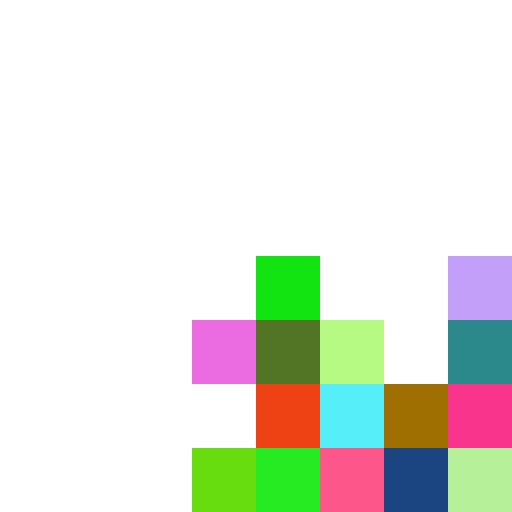

In [146]:
shape_as_image(organic_shape(), random_color = True)